# Data Analysis 

**The columns of the dataframe:**

> Age: displays the age of the individual.

> Sex: displays the gender of the individual using the following format :
>> 1 = male

>> 0 = female

> Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :
>> 1 = typical angina

>> 2 = atypical angina

>> 3 = non — anginal pain

>> 4 = asymptotic

> Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit)

> Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

> Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.
>> If fasting blood sugar > 120mg/dl then : 1 (true)

>> else : 0 (false)

> Resting ECG : displays resting electrocardiographic results
>> 0 = normal

>> 1 = having ST-T wave abnormality

>> 2 = left ventricular hyperthrophy

> Max heart rate achieved : displays the max heart rate achieved by an individual.

> Exercise induced angina :
>> 1 = yes

>> 0 = no

> ST depression induced by exercise relative to rest: displays the value which is an integer or float.

> Peak exercise ST segment :
>> 1 = upsloping

>> 2 = flat

>> 3 = downsloping

> Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.

> Thal : displays the thalassemia :
>> 3 = normal

>> 6 = fixed defect

>> 7 = reversible defect

> num : Displays whether the individual is suffering from heart disease or not :
>> 0 = absence

>>1, 2, 3, 4 = present.

## Imports

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

import the data directly from the website


In [2]:
# here the path of the file
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

#define the name of each column in the dataset
names = ['age',       
      'sex',       
      'cp',        
      'trestbps',  
      'chol',      
      'fbs',       
      'restecg',   
      'thalach',
      'exang',     
      'oldpeak',   
      'slope',     
      'ca',         
      'thal',      
      'num']

# save the data as CSV file
df = pd.read_csv("heart.csv")
df.rename(columns = {'target':'num'}, inplace = True)



# Assessing

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


**show the data type of each column and the number of non null values**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  num       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Check if there is any duplicates or missing values**



In [6]:
df.isnull().sum()

# using isnull method will return that there isn't any NAN values because it is replaced by string (?) in the data set

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

**We notice that there is no missing values!! even if we know that there was... This is because that .isnull() recognized only na nan values as missing**

**Therefore, you need first change the ? in the dataframe to be na or nan, then check for the missing values again**



In [7]:
df.replace('?',None)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

**Change the datatype of sex into int instead of float**

In [9]:
df['sex'] = df['sex'].apply(pd.to_numeric)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Basic Questions

**The num column represented the type of heart disease that faced the patients, What are the count of patients in each type of heart disease ?**

In [10]:
df.num.value_counts()

1    165
0    138
Name: num, dtype: int64

**convert this dataset into a binary data, the non-heart disease has a value 0, and any value other than 0, indicated that the patient has heart disease will be a class 1**

**all the next question will be on this dataset**

In [11]:
df['num'] = np.where(df['num'] != 0,1,df['num'])
df.num.value_counts()

1    165
0    138
Name: num, dtype: int64

**draw the pie plot to the target variable in the binary dataset**

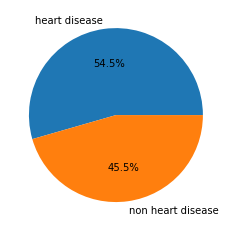

In [12]:
plt.pie(df['num'].value_counts(),labels=["heart disease","non heart disease"],autopct='%1.1f%%');

**what is the number of non-heart disease and heart disease patient in each gender**

In [13]:
df.groupby(["sex","num"]).size()

sex  num
0    0       24
     1       72
1    0      114
     1       93
dtype: int64

**Draw the histogram to the chol column for people with heart disease and without heart disease**



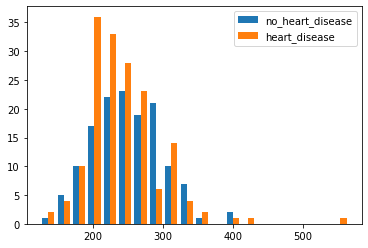

In [14]:
no_heart_disease = df[df.num == 0]
heart_disease = df[df.num == 1]
bins = 20

plt.hist([no_heart_disease.chol, heart_disease.chol], bins, label=['no_heart_disease', 'heart_disease'])
plt.legend(loc='upper right')
plt.show()

**Draw the heat map for the data**



In [15]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


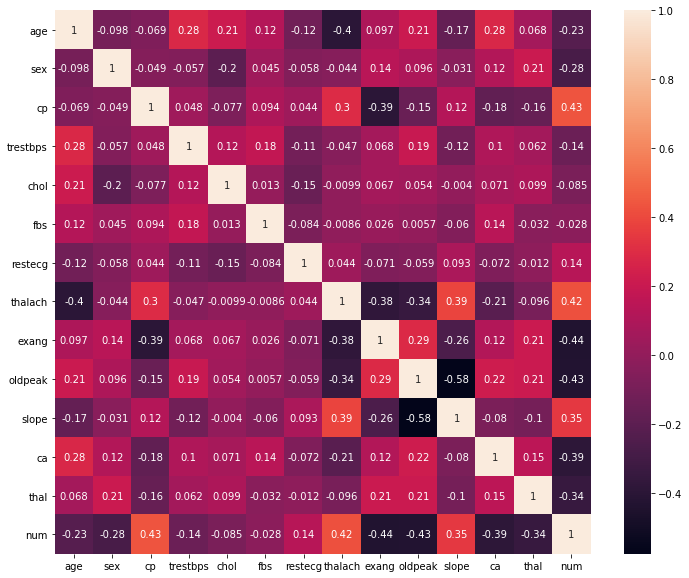

In [16]:
plt.figure(figsize=[12,10])
sns.heatmap(df.corr(),  annot=True);
plt.show()

**Draw the box plot between the age and target (num)**

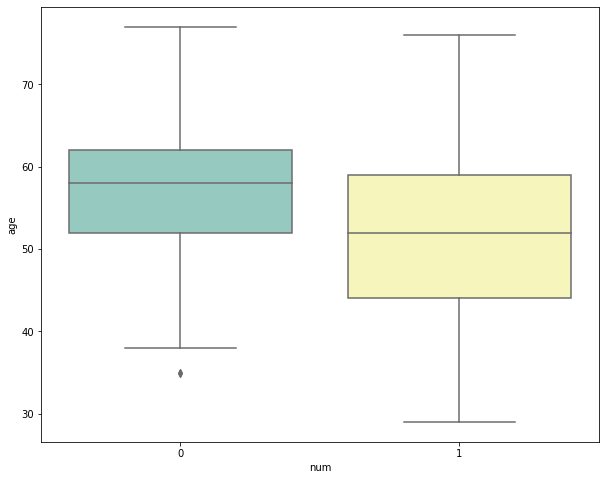

In [17]:
plt.figure(figsize=[10,8])

sns.boxplot(x='num',y='age',data=df, palette="Set3")

plt.show()

**Plot hist for each feature to get insight**

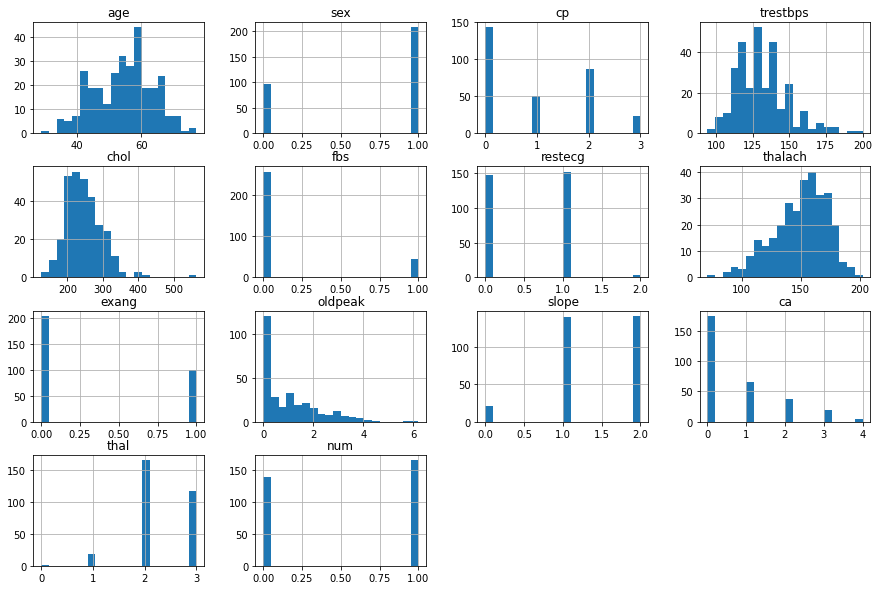

In [18]:
df.hist(bins=20, figsize=(15, 10));


#### ----------------------------------------------------------------------------------------------------------------------

# Machine Learning

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [19]:
df = pd.read_csv("advertising.csv")

In [20]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [22]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis


**Create a histogram of the Age**

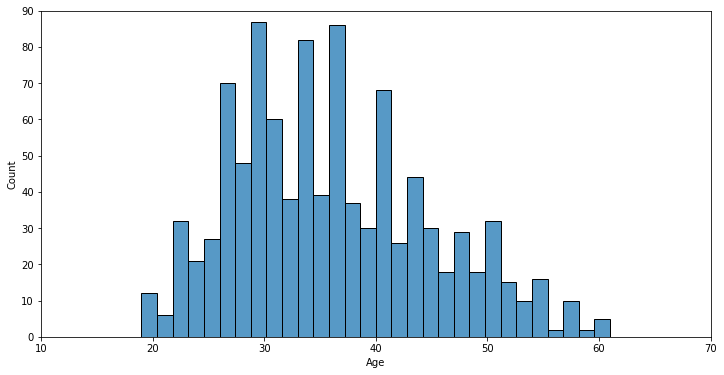

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.histplot(data=df,x="Age",bins=30)

plt.xlim([10, 70])
plt.ylim([0, 90])

plt.show()

# Standardize the Variables



In [24]:
from sklearn.preprocessing import StandardScaler

**First: drop object variables, as the scaller can be applied only on int and float variables**


In [25]:
scaler = StandardScaler()


**Fit scaler to the features.**

In [26]:
df_numeric = df.drop(columns=["Ad Topic Line","Country","Timestamp","City","Clicked on Ad"])


In [27]:
df_numeric.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male'],
      dtype='object')

In [28]:
scaled = scaler.fit_transform(df_numeric)

In [29]:
df_n = pd.DataFrame(scaled,columns=df_numeric.columns,index=df_numeric.index)
df_n.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,0.249267,-0.114905,0.509691,1.734030,-0.962695
1,0.961132,-0.570425,1.002530,0.313805,1.038750
2,0.282083,-1.139826,0.356949,1.287589,-0.962695
3,0.577432,-0.798185,-0.014456,1.501580,1.038750
4,0.212664,-0.114905,1.408868,1.038731,-0.962695


# Random Forest and Logistic Regression



In [30]:
from sklearn.model_selection import train_test_split

X = df_n.values
y = df["Clicked on Ad"].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

**Train and fit a logistic regression model on the training set.**

In [31]:
from sklearn.linear_model import LogisticRegression

Logistic = LogisticRegression()

Logistic.fit(X_train,y_train)


LogisticRegression()

## Predictions and Evaluations
**Now predict values for the testing data.**

In [32]:
y_pred = Logistic.predict(X_test)

**Create a classification report for the model.**

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       146
           1       0.98      0.96      0.97       154

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



**Get the best values for n_estimators and max_depth parameters for RF**

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, GridSearchCV


rf = RandomForestClassifier(random_state=42)
kf = KFold(n_splits=10, shuffle=False)

params = {
    'n_estimators': [5,20,50 ,75, 100, 150, 200],
    'max_depth': [ 2,4,6, 8, 10],
    'max_features': ['log2'],
}
grid_no_up = GridSearchCV(rf, param_grid=params, cv=kf, scoring='accuracy', verbose=1, n_jobs=-1) 
grid_no_up.fit(X_train, y_train)

best_hyperparams = grid_no_up.best_params_
print('Best hyerparameters:\n' , best_hyperparams)

best_CV_score = grid_no_up.best_score_
print('Best CV accuracy')
print(best_CV_score)

best_model = grid_no_up.best_estimator_

Fitting 10 folds for each of 35 candidates, totalling 350 fits
Best hyerparameters:
 {'max_depth': 4, 'max_features': 'log2', 'n_estimators': 50}
Best CV accuracy
0.9685714285714286


**Create a classification report for the best model.**

In [46]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
rfc2 = RandomForestClassifier(n_estimators = 50, max_depth = 4, max_features = 'log2' )
rfc2.fit(X_train,y_train)
pred = rfc2.predict(X_test)

print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[136  10]
 [ 10 144]]


              precision    recall  f1-score   support

           0       0.93      0.93      0.93       146
           1       0.94      0.94      0.94       154

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [37]:
from sklearn.neighbors import KNeighborsClassifier


In [38]:

knn = KNeighborsClassifier(n_neighbors=1)



In [39]:
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=1)

## Predictions and Evaluations


In [40]:
y_pred = knn.predict(X_test)


**Create a confusion matrix and classification report.**

In [41]:
print(confusion_matrix(y_test,y_pred))


[[137   9]
 [ 12 142]]


In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       146
           1       0.94      0.92      0.93       154

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



## Choosing a K Value


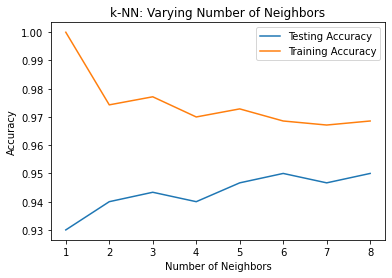

In [43]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy[i] = knn.score(X_train,y_train)
    test_accuracy[i] = knn.score(X_test,y_test)
    
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show() 

## Retrain with new K Value



In [44]:
knn = KNeighborsClassifier(n_neighbors = 6)

knn.fit(X_train,y_train)

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))


[[137   9]
 [ 12 142]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       146
           1       0.94      0.92      0.93       154

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

